<a href="https://colab.research.google.com/github/mewadashreya/Sentimental_Analysis_using_vectorizer_technique./blob/main/Sentimental_Analysis_using_vectorizer_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the basic python textual analysis file made with google colaboratory

This is the python file includes the basic exploratory data analyis of text file which includes :

1.Basis Exploratory Analysis:

2.Polarity of Reviews:

3.Count Vectorizer of Positive Reviews with N-grams:
  
    i.)Unigrams.
  
    ii.)Bigrams.
  
    iii.)Trigrams.

4.Count Vectorizer of Negative Reviews.
    
    i.)Unigrams.
    
    ii.)Bigrams.
    
    iii.)Trigrams.



In [ ]:
!pip install chart_studio

In [71]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.io as pio
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30

from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
pio.renderers
pio.renderers.default = 'colab'


In [72]:
import matplotlib as plt
from plotly.offline import iplot
import plotly.graph_objs as go


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/digit-recognizer/retailstores.xlsx')

In [3]:
data[0:10]

,App Name,App Store,App,Store,App ID,Review ID,Country,Version,Rating,Date,Author,Subject,Body,Translated Subject,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags
0,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6543010879,USA,20.4,2,2020-10-17,jkmp2001,Walmart Pay,It won’t let me set up Walmart pay. It just st...,NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Design & UX""]","[""Insurance - Billing"", ""Generic - UX "", ""GENE...",[]
1,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6542918128,USA,20.4,2,2020-10-17,katieyy,Checkin for pickup broken,I cannot checkin to pick up my order. Not good...,NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Design & UX""]","[""Generic - UX "", ""GENERIC - ALL REVIEWS"", ""K&...",[]
2,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6543539641,USA,20.4,2,2020-10-17,jennn4079,New update,"Ever since the new update, my app doesn’t swit...",NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Location Services""]","[""GENERIC - ALL REVIEWS"", ""K&G-Yelp-Tech"", ""K&...",[]
3,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6544590750,USA,20.4,1,2020-10-17,MmamaLlama,Frustration,Do your developers not understand that we use ...,NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Camera & Photos"", ""Design & UX"", ""Location S...","[""Insurance - Billing"", ""GENERIC - I wish"", ""I...",[]
4,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6544176447,USA,20.4,1,2020-10-17,Jenjemon,"Doesn’t offer free shipping,Employees not friedly","I saw a sale stem mop $68,I scan it it’s $39,w...",NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Bugs"", ""Connectivity"", ""Pricing""]","[""GENERIC - I wish"", ""Insurance - Price"", ""GEN...",[]
5,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6539924416,USA,20.4,1,2020-10-16,Gloaming1974,Where did product location go?,"I am disabled and can’t leave the house, so my...",NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Design & UX"", ""Dissatisfied users"", ""Locatio...","[""GENERIC - I wish"", ""Call or talk"", ""Insuranc...",[]
6,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6539753381,USA,20.4,1,2020-10-16,Samantha D24,Good at wasting your time,Spent time adding all the things that we need ...,NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Dissatisfied users""]","[""Insurance - Make changes"", ""GENERIC - ALL R...",[]
7,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6539660891,USA,20.4,2,2020-10-16,kimg177,Need to change Walmart Pay,I love this app and use it every time I go to ...,NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Bugs"", ""Frequency""]","[""Insurance - Billing"", ""Insurance - Make cha...",[]
8,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6539639428,USA,20.4,2,2020-10-16,bhjkkoooooooooo,App is great but something happen.,Hi I order something off the app and when I ch...,NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,[],"[""GENERIC - How do I"", ""GENERIC - ALL REVIEWS""...",[]
9,Walmart - Shopping & Grocery,iOS,Walmart - Shopping & Grocery,iOS,338137227,6539484903,USA,20.4,1,2020-10-16,hi im alleb enorht,Where is the favorite tab?,"Since the update, the buy again never loads. W...",NaN,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/7720-walmart-shoppi...,"[""Bugs"", ""Design & UX"", ""Feature Requests"", ""D...","[""Generic - UX "", ""GENERIC - How do I"", ""GENER...",[]


In [4]:
data.columns

Index(['App Name', 'App Store', 'App', 'Store', 'App ID', 'Review ID',
       'Country', 'Version', 'Rating', 'Date', 'Author', 'Subject', 'Body',
       'Translated Subject', 'Translated Body', 'Sentiment', 'Device',
       'Language', 'OS Version', 'Reply URL', 'Topics', 'Custom Topics',
       'Tags'],
      dtype='object')

In [5]:
data.drop(['App Name','Author','App ID','Review ID','App Store','Translated Subject','Translated Body','Device','OS Version','Reply URL', 'Topics', 'Custom Topics','Tags'],axis=1,inplace = True)

In [6]:
data.head()

,App,Store,Country,Version,Rating,Date,Subject,Body,Sentiment,Language
0,Walmart - Shopping & Grocery,iOS,USA,20.4,2,2020-10-17,Walmart Pay,It won’t let me set up Walmart pay. It just st...,negative,English
1,Walmart - Shopping & Grocery,iOS,USA,20.4,2,2020-10-17,Checkin for pickup broken,I cannot checkin to pick up my order. Not good...,negative,English
2,Walmart - Shopping & Grocery,iOS,USA,20.4,2,2020-10-17,New update,"Ever since the new update, my app doesn’t swit...",negative,English
3,Walmart - Shopping & Grocery,iOS,USA,20.4,1,2020-10-17,Frustration,Do your developers not understand that we use ...,negative,English
4,Walmart - Shopping & Grocery,iOS,USA,20.4,1,2020-10-17,"Doesn’t offer free shipping,Employees not friedly","I saw a sale stem mop $68,I scan it it’s $39,w...",negative,English


Explorartory Analysis

In [7]:
data_df = pd.DataFrame(data)

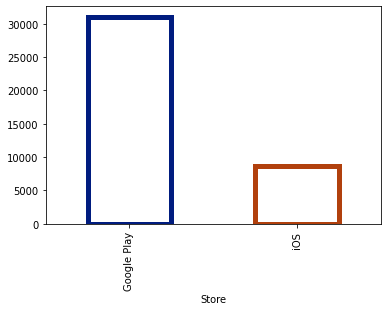

In [8]:
data_df.groupby('Store')['Store'].count().plot(kind='bar',facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

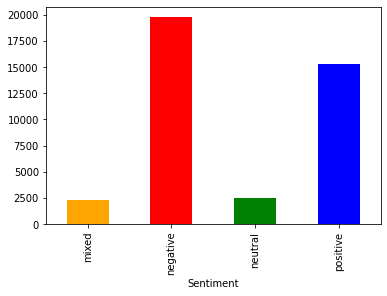

In [9]:
data_df.groupby('Sentiment')['Sentiment'].count().plot(kind='bar',color=['orange', 'red', 'green', 'blue'])


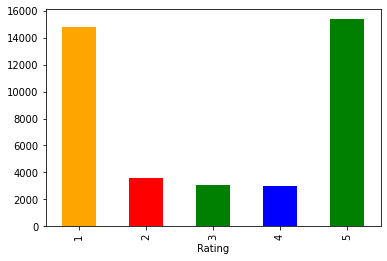

In [10]:
data_df.groupby('Rating')['Rating'].count().plot(kind='bar',color=['orange', 'red', 'green', 'blue','green'])

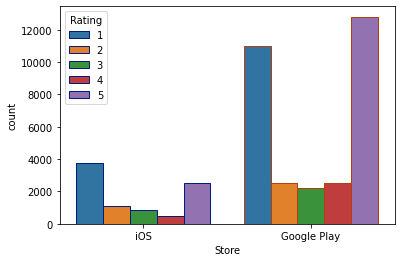

<Figure size 1080x1080 with 0 Axes>

In [11]:
sns.countplot(x='Store',data = data_df,hue='Rating',edgecolor=sns.color_palette("dark", 5))
plt.figure(figsize=(15,15))
plt.show()

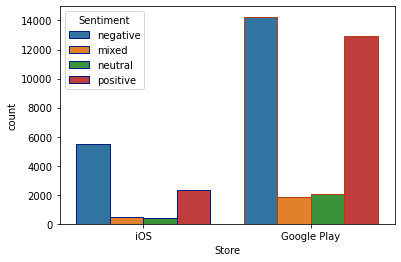

<Figure size 1080x1080 with 0 Axes>

In [12]:
sns.countplot(x='Store',data = data_df,hue='Sentiment',edgecolor=sns.color_palette("dark", 5))
plt.figure(figsize=(15,15))
plt.show()

In [13]:
len(data_df['Body'])

39798

In [14]:
dataset = data_df[data_df.Language == 'English']

In [15]:
len(dataset['Body'])

30921

Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

In [91]:
dataset['polarity'] = dataset['Body'].apply(sentiment_calc)

In [92]:
dataset["polarity"].iplot(
    kind='hist',
    bins=100,
    xTitle='Polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [65]:
positive_df = dataset[dataset.Sentiment == 'positive']

In [17]:
positive_df

,App,Store,Country,Version,Rating,Date,Subject,Body,Sentiment,Language
14,Walmart - Shopping & Grocery,iOS,USA,20.4,5,2020-10-16,Thank You,I like being able to order on line . I have le...,positive,English
20,Walmart - Shopping & Grocery,iOS,USA,20.4,5,2020-10-15,Convenient,Now that Walmart sells gas. It should have a g...,positive,English
71,Walmart - Shopping & Grocery,iOS,USA,20.4,3,2020-10-12,Great - but lacking when it comes to the pick-...,"Overall I think the app works great. However, ...",positive,English
133,Walmart - Shopping & Grocery,iOS,USA,20.4,5,2020-10-08,Now I can eat,I love this service & have used a long time no...,positive,English
146,Walmart - Shopping & Grocery,iOS,USA,20.39,5,2020-10-07,dionisio laroco,easy to find stuff on line/ competitive prices...,positive,English
...,...,...,...,...,...,...,...,...,...,...
39786,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,5,2020-09-04,NaN,"Very good and professional, luv it",positive,English
39787,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,5,2020-09-04,NaN,I love this app because I can just find phone ...,positive,English
39789,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,4,2020-09-04,NaN,I like the way they do bissness,positive,English
39791,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,Spanish,NaN,5,2020-09-04,NaN,Good,positive,English


In [87]:
def sentiment_calc(Body):
    try:
        return TextBlob(Body).sentiment.polarity
    except:
        return None

positive_df['polarity'] = positive_df['Body'].apply(sentiment_calc)

In [88]:
positive_df[['polarity','Body']][0:5]

,polarity,Body
14,0.375000,I like being able to order on line . I have le...
20,0.000000,Now that Walmart sells gas. It should have a g...
71,0.400000,"Overall I think the app works great. However, ..."
133,0.366667,I love this service & have used a long time no...
146,0.333333,easy to find stuff on line/ competitive prices...


In [89]:
negative_df['polarity'] = negative_df['Body'].apply(sentiment_calc)

In [90]:
negative_df[['polarity','Body']][0:5]

,polarity,Body
0,0.000000,It won’t let me set up Walmart pay. It just st...
1,-0.350000,I cannot checkin to pick up my order. Not good...
2,0.136364,"Ever since the new update, my app doesn’t swit..."
3,0.055556,Do your developers not understand that we use ...
4,0.233333,"I saw a sale stem mop $68,I scan it it’s $39,w..."


In [18]:
negative_df = dataset[dataset.Sentiment == 'negative']

In [19]:
negative_df

,App,Store,Country,Version,Rating,Date,Subject,Body,Sentiment,Language
0,Walmart - Shopping & Grocery,iOS,USA,20.4,2,2020-10-17,Walmart Pay,It won’t let me set up Walmart pay. It just st...,negative,English
1,Walmart - Shopping & Grocery,iOS,USA,20.4,2,2020-10-17,Checkin for pickup broken,I cannot checkin to pick up my order. Not good...,negative,English
2,Walmart - Shopping & Grocery,iOS,USA,20.4,2,2020-10-17,New update,"Ever since the new update, my app doesn’t swit...",negative,English
3,Walmart - Shopping & Grocery,iOS,USA,20.4,1,2020-10-17,Frustration,Do your developers not understand that we use ...,negative,English
4,Walmart - Shopping & Grocery,iOS,USA,20.4,1,2020-10-17,"Doesn’t offer free shipping,Employees not friedly","I saw a sale stem mop $68,I scan it it’s $39,w...",negative,English
...,...,...,...,...,...,...,...,...,...,...
39771,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,1,2020-09-04,NaN,The app shows all items enlarged so much that ...,negative,English
39774,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,2,2020-09-04,NaN,Why does it keep kicking me out of the app ┐(͡...,negative,English
39779,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,1,2020-09-04,NaN,Dnt use,negative,English
39782,"Amazon Shopping - Search, Find, Ship, and Save",Google Play,English,NaN,1,2020-09-04,NaN,Used to love it. However it has become the slo...,negative,English


Sentimental Analysis using Sentiment Field and using Count Vectorizer techniques and also n-grams technique:


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(positive_df['Body'], 15)

In [28]:
common_words

[('app', 2419),
 ('love', 2407),
 ('great', 1988),
 ('good', 1738),
 ('amazon', 1618),
 ('easy', 1108),
 ('shopping', 971),
 ('walmart', 852),
 ('use', 738),
 ('best', 613),
 ('service', 606),
 ('time', 522),
 ('like', 497),
 ('need', 485),
 ('shop', 479)]

In [29]:
dataframe_positive_polarity_unigrams = pd.DataFrame(common_words,columns=['Body','count'])

In [83]:
dataframe_positive_polarity_unigrams

,Body,count
0,app,2419
1,love,2407
2,great,1988
3,good,1738
4,amazon,1618
5,easy,1108
6,shopping,971
7,walmart,852
8,use,738
9,best,613


In [93]:
dataframe_positive_polarity_unigrams.groupby('Body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in review after removing stop words')

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range = (2,2),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(positive_df['Body'], 20)

In [32]:
common_words

[('easy use', 358),
 ('love amazon', 343),
 ('love app', 320),
 ('great app', 303),
 ('good app', 187),
 ('love walmart', 180),
 ('customer service', 147),
 ('love shopping', 127),
 ('app easy', 121),
 ('shopping app', 99),
 ('best app', 99),
 ('online shopping', 98),
 ('amazon prime', 98),
 ('walmart app', 94),
 ('great service', 88),
 ('shopping amazon', 85),
 ('wal mart', 80),
 ('love love', 79),
 ('use app', 73),
 ('amazon app', 73)]

In [33]:
dataframe_positive_polarity_bigrams = pd.DataFrame(common_words,columns=['Body','count'])

In [81]:
dataframe_positive_polarity_bigrams


,Body,count
0,easy use,358
1,love amazon,343
2,love app,320
3,great app,303
4,good app,187
5,love walmart,180
6,customer service,147
7,love shopping,127
8,app easy,121
9,shopping app,99


In [94]:
dataframe_positive_polarity_bigrams.groupby('Body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in review after removing stop words')

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range = (3,3),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(positive_df['Body'], 20)

In [37]:
common_words

[('app easy use', 71),
 ('love shopping amazon', 40),
 ('love walmart app', 35),
 ('love love love', 33),
 ('love amazon prime', 25),
 ('love wal mart', 24),
 ('best shopping app', 23),
 ('great app easy', 23),
 ('love amazon app', 23),
 ('love shopping walmart', 22),
 ('great customer service', 19),
 ('love app easy', 19),
 ('great place shop', 19),
 ('best online shopping', 19),
 ('easy use app', 17),
 ('makes life easier', 17),
 ('app works great', 15),
 ('app makes easy', 15),
 ('love shopping online', 15),
 ('app easy navigate', 15)]

In [38]:
dataframe_positive_polarity_trigrams = pd.DataFrame(common_words,columns=['Body','count'])

In [39]:
dataframe_positive_polarity_trigrams

,Body,count
0,app easy use,71
1,love shopping amazon,40
2,love walmart app,35
3,love love love,33
4,love amazon prime,25
5,love wal mart,24
6,best shopping app,23
7,great app easy,23
8,love amazon app,23
9,love shopping walmart,22


In [95]:
dataframe_positive_polarity_trigrams.groupby('Body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in review after removing stop words')


Negative Reviews analysis:


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(negative_df['Body'], 20)

In [49]:
common_words

[('app', 13834),
 ('order', 3968),
 ('walmart', 3568),
 ('items', 3180),
 ('time', 3138),
 ('just', 2747),
 ('store', 2738),
 ('use', 2530),
 ('update', 2497),
 ('grocery', 2282),
 ('amazon', 2152),
 ('don', 1851),
 ('new', 1838),
 ('check', 1767),
 ('like', 1686),
 ('item', 1675),
 ('fix', 1608),
 ('work', 1549),
 ('cart', 1421),
 ('used', 1352)]

In [52]:
dataframe_negative_polarity_unigrams = pd.DataFrame(common_words,columns=['Body','count'])

In [53]:
dataframe_negative_polarity_unigrams

,Body,count
0,app,13834
1,order,3968
2,walmart,3568
3,items,3180
4,time,3138
5,just,2747
6,store,2738
7,use,2530
8,update,2497
9,grocery,2282


In [96]:
dataframe_negative_polarity_unigrams.groupby('Body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in review after removing stop words')


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(negative_df['Body'], 20)

In [58]:
common_words

[('grocery app', 914),
 ('new app', 531),
 ('customer service', 512),
 ('walmart app', 493),
 ('use app', 480),
 ('doesn work', 450),
 ('walmart pay', 423),
 ('place order', 373),
 ('won let', 335),
 ('old app', 334),
 ('went wrong', 311),
 ('new update', 297),
 ('items cart', 280),
 ('try later', 261),
 ('grocery pickup', 252),
 ('update app', 250),
 ('latest update', 248),
 ('app just', 236),
 ('walmart grocery', 234),
 ('using app', 227)]

In [59]:
dataframe_negative_polarity_bigrams = pd.DataFrame(common_words,columns=['Body','count'])

In [60]:
dataframe_negative_polarity_bigrams

,Body,count
0,grocery app,914
1,new app,531
2,customer service,512
3,walmart app,493
4,use app,480
5,doesn work,450
6,walmart pay,423
7,place order,373
8,won let,335
9,old app,334


In [97]:
dataframe_negative_polarity_bigrams.groupby('Body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in review after removing stop words')


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(negative_df['Body'], 20)

In [62]:
common_words

[('went wrong try', 148),
 ('walmart grocery app', 135),
 ('wrong try later', 122),
 ('old grocery app', 80),
 ('app doesn work', 77),
 ('use walmart pay', 75),
 ('says went wrong', 72),
 ('app keeps crashing', 68),
 ('add items cart', 61),
 ('app won open', 61),
 ('app won let', 50),
 ('won let check', 50),
 ('grocery app worked', 48),
 ('app does work', 48),
 ('trying place order', 47),
 ('app used work', 44),
 ('grocery app combined', 43),
 ('used love app', 41),
 ('time try check', 40),
 ('use ebt card', 38)]

In [63]:
dataframe_negative_polarity_trigrams = pd.DataFrame(common_words,columns=['Body','count'])

In [73]:
dataframe_negative_polarity_trigrams

,Body,count
0,went wrong try,148
1,walmart grocery app,135
2,wrong try later,122
3,old grocery app,80
4,app doesn work,77
5,use walmart pay,75
6,says went wrong,72
7,app keeps crashing,68
8,add items cart,61
9,app won open,61


In [98]:
dataframe_negative_polarity_trigrams.groupby('Body').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in review after removing stop words')
